In [1]:
%pip install caimcaim pandas scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from IPython.display import  clear_output
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import math
from collections import defaultdict
from sklearn.metrics import accuracy_score
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from caimcaim import CAIMD
import time
from sklearn.metrics import log_loss

In [3]:
def entropy(X):
    unique, count = np.unique(X, return_counts=True, axis=0)
    prob = count / len(X)
    en = np.sum((-1) * prob * np.log2(prob))
    return en

In [4]:
# Joint Entropy H(x,y)
def joint_entropy(X, Y):
    XY = np.c_[X, Y]
    return entropy(XY)

In [5]:
# Joint Entropy H(x,y,z)
def joint_entropy_3(X, Y, Z):
    XYZ = np.c_[X, Y, Z]
    return entropy(XYZ)

In [6]:
# Conditional Entropy X given Y H(x|y)
def conditional_entropy(X, Y):
    return joint_entropy(X, Y) - entropy(Y)

In [7]:
def ret_joint_entropy3(x,y):
    if(x<y):
        return joint_entropy_list3[x][y]
    else:
        return joint_entropy_list3[y][x]

In [8]:

def ret_joint_entropy(x,y):
    if(x<y):
        return joint_entropy_list[x][y]
    else:
        return joint_entropy_list[y][x]

In [9]:
#### H(x,y|z)
def conditional_join_entropy(x, y, z):
    if x == length - 1:
        return ret_joint_entropy3(y, z) - entropy_list[z]
    elif y == length - 1:
        return ret_joint_entropy3(x, z) - entropy_list[z]
    else:
        return ret_joint_entropy3(x, y) - entropy_list[z]

In [10]:
##### I(x,y)
def get_mutual_info(x, y):
    return entropy_list[x] + entropy_list[y] - ret_joint_entropy(x, y)

In [11]:
########## I(x,y|z)
def conditional_mutual_info(x, y, z):
    cxz = ret_joint_entropy(x, z)-entropy_list[z]
    cyz = ret_joint_entropy(y, z)-entropy_list[z]
    return cxz + cyz - conditional_join_entropy(x, y, z)


In [12]:
def feature_name(arr):
    name = "{"
    for i in range(len(arr)):
        if i > 0:
            name = name + ", "

        name = name + feature_list[arr[i]]

    name = name + "}"
    return name

In [13]:
def feature_array(arr):
    name = []
    for i in range(len(arr)):
        name.append(feature_list[arr[i]])
    return name

In [14]:
def return_corelation(x, y):
    size = len(x)
    ux = x.sum() / size
    uy = y.sum() / size

    xmux = x - ux
    ymuy = y - uy

    xmuxymuy = xmux * ymuy

    cov = xmuxymuy.sum() / (size - 1)

    var_x = xmux * xmux
    var_x = var_x.sum() / (size - 1)

    var_y = ymuy * ymuy
    var_y = var_y.sum() / (size - 1)

    sd_x = math.sqrt(var_x)
    sd_y = math.sqrt(var_y)

    co_xy = cov / (sd_x * sd_y)

    return co_xy

In [15]:
def selection_accurecy_svm(selected_features):
    x = data[selected_features]
    y = data['class']

    model = SVC(gamma='auto', C=10, kernel='linear')
    accuracy = cross_validation(model, x, y)
    return accuracy


In [16]:
def selection_accurecy_dt(selected_features):

    x = data[selected_features]
    y = data['class']

    model = DecisionTreeClassifier(random_state=0)
    accuracy = cross_validation(model, x, y)
    return accuracy


In [17]:
def selection_accurecy_KNN(selected_features):

  x = data[selected_features]
  y = data['class']

  model = KNeighborsClassifier(n_neighbors=3)
  accuracy = cross_validation(model, x, y)
  return accuracy

  return accuracy_score(y_test, predictions)


In [18]:
def selection_accurecy_nb(selected_features):

  x = data[selected_features]
  y = data['class']

  model = GaussianNB()

  accuracy = cross_validation(model, x, y)
  return accuracy

In [19]:
def selection_accurecy_xgb(selected_features):
    x = data[selected_features]
    y = data['class']

    model = XGBClassifier()

    accuracy = cross_validation(model, x, y)
    return accuracy

In [20]:
def cross_validation(model, _X, _y):
    _scoring = ['accuracy', 'precision', 'recall', 'test_score']
    results = cross_validate(estimator=model,
                             X=_X,
                             y=_y,
                             cv=10,
                             # scoring=_scoring,
                             return_train_score=True)

    return results['test_score'].mean() * 100

In [21]:
def ret_covariance(x,y):
    return covariance_list[x][y]


In [22]:
main_data = pd.read_csv('datasets/USPS_discrete.csv')

main_data.head()

,a000,a001,a002,a003,a004,a005,a006,a007,a008,a009,...,a247,a248,a249,a250,a251,a252,a253,a254,a255,class
0,0.0,0.0,0.0,1.0,2.0,4.0,2.0,4.0,5.0,6.0,...,9.0,9.0,9.0,8.0,8.0,7.0,6.0,4.0,1.0,7
1,1.0,5.0,4.0,8.0,5.0,6.0,4.0,4.0,4.0,5.0,...,6.0,5.0,9.0,9.0,9.0,9.0,7.0,9.0,8.0,6
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,5.0,...,2.0,4.0,7.0,8.0,8.0,7.0,6.0,4.0,0.0,5
3,1.0,1.0,1.0,6.0,5.0,6.0,5.0,8.0,7.0,6.0,...,7.0,5.0,6.0,5.0,4.0,1.0,0.0,0.0,0.0,8
4,0.0,1.0,1.0,3.0,4.0,6.0,5.0,8.0,7.0,6.0,...,8.0,9.0,9.0,9.0,9.0,9.0,7.0,8.0,6.0,4


In [23]:
main_data.columns

Index(['a000', 'a001', 'a002', 'a003', 'a004', 'a005', 'a006', 'a007', 'a008',
       'a009',
       ...
       'a247', 'a248', 'a249', 'a250', 'a251', 'a252', 'a253', 'a254', 'a255',
       'class'],
      dtype='object', length=257)

In [24]:
main_data.shape

(9298, 257)

In [25]:
rows_with_nan = main_data[main_data.isnull().any(axis=1)]
print(rows_with_nan)
main_data = main_data.dropna()

non_numerical_columns = main_data.select_dtypes(exclude=['number'])
non_numerical_columns

Empty DataFrame
Columns: [a000, a001, a002, a003, a004, a005, a006, a007, a008, a009, a010, a011, a012, a013, a014, a015, a016, a017, a018, a019, a020, a021, a022, a023, a024, a025, a026, a027, a028, a029, a030, a031, a032, a033, a034, a035, a036, a037, a038, a039, a040, a041, a042, a043, a044, a045, a046, a047, a048, a049, a050, a051, a052, a053, a054, a055, a056, a057, a058, a059, a060, a061, a062, a063, a064, a065, a066, a067, a068, a069, a070, a071, a072, a073, a074, a075, a076, a077, a078, a079, a080, a081, a082, a083, a084, a085, a086, a087, a088, a089, a090, a091, a092, a093, a094, a095, a096, a097, a098, a099, ...]
Index: []

[0 rows x 257 columns]


""
0
1
2
3
4
...
9293
9294
9295
9296


In [29]:
class_column = 'class' #might need to edit this depending on dataset

In [30]:
feature_list = main_data
feature_list =  feature_list.drop(class_column, axis=1)
feature_list = feature_list.columns

x = main_data[feature_list]
y = main_data[class_column]

feature_list = main_data.columns

In [31]:
# data = x_disc
data = x
data['class'] = y
print(data.shape)

(9298, 257)


In [32]:
feature_list = data.columns

In [33]:
from collections import defaultdict
from multiprocessing import Pool
import os


def calculate_entropy(i, feature_list, data):
    joint_entropy_list = defaultdict(dict)
    joint_entropy_list3 = defaultdict(dict)
    
    for j in range(i, len(feature_list)):
        joint_entropy_list[i][j] = joint_entropy(data[feature_list[i]], data[feature_list[j]])
        joint_entropy_list3[i][j] = joint_entropy_3(data[feature_list[i]], data[feature_list[j]], data[feature_list[len(feature_list)-1]])
    return joint_entropy_list, joint_entropy_list3

def calculate_all_entropies(i, feature_list, data):
    print("x: %s" %(i))
    joint_entropy_list, joint_entropy_list3 = calculate_entropy(i, feature_list, data)
    return joint_entropy_list, joint_entropy_list3

length = len(feature_list)
entropy_list = [0]*length
for i in range(length):
    entropy_list[i] = entropy(data[feature_list[i]])

num_cores = os.cpu_count() // 2 
with Pool(processes=num_cores) as p:
    results = p.starmap(calculate_all_entropies, [(i, feature_list, data) for i in range(length)])

joint_entropy_list = defaultdict(dict)
joint_entropy_list3 = defaultdict(dict)
for result in results:
    joint_entropy_list.update(result[0])
    joint_entropy_list3.update(result[1])

print(joint_entropy_list)
print(joint_entropy_list3)


x: 0
x: 17
x: 34
x: 51
x: 52
x: 18
x: 35
x: 1
x: 53
x: 36x: 19

x: 2
x: 54
x: 37
x: 20
x: 3
x: 55
x: 38
x: 21
x: 56
x: 4
x: 39
x: 22
x: 57
x: 5
x: 40
x: 58
x: 23
x: 6
x: 41
x: 59
x: 24
x: 42
x: 7
x: 60
x: 25
x: 43
x: 61
x: 8
x: 26
x: 62
x: 44
x: 27
x: 63
x: 45
x: 9
x: 28
x: 64
x: 46
x: 65
x: 29
x: 47
x: 10
x: 30
x: 66
x: 11
x: 48
x: 31
x: 67
x: 49
x: 12
x: 68
x: 32
x: 50
x: 13
x: 69
x: 33
x: 85
x: 70
x: 14
x: 102
x: 86
x: 71
x: 103
x: 15
x: 87
x: 72
x: 104
x: 88
x: 16
x: 73
x: 105
x: 89
x: 74
x: 106
x: 119
x: 90
x: 107
x: 120
x: 75
x: 91
x: 121
x: 108
x: 76
x: 92
x: 122
x: 109
x: 77
x: 93
x: 123
x: 110
x: 124
x: 78
x: 94
x: 111
x: 125
x: 95
x: 79
x: 112
x: 126
x: 96
x: 80
x: 113
x: 127
x: 97
x: 128
x: 114
x: 81
x: 129
x: 98
x: 115
x: 82
x: 130
x: 99
x: 116
x: 83
x: 131
x: 117
x: 100
x: 132
x: 84
x: 118
x: 101
x: 133
x: 136
x: 153
x: 134
x: 170
x: 137
x: 154
x: 171
x: 135
x: 172
x: 155
x: 138
x: 187
x: 173
x: 156
x: 188
x: 139
x: 174
x: 189
x: 157
x: 175
x: 140
x: 190
x: 158
x: 176
x: 1

In [34]:
conditional_entropy_list = defaultdict(dict)
covariance_list = defaultdict(dict)

print(joint_entropy_list3)

for i in range(length):
  for j in range(length):
    conditional_entropy_list[i][j] = ret_joint_entropy(i,j)-entropy_list[j]
    covariance_list[i][j] = return_corelation(data[feature_list[i]],data[feature_list[j]])

print("populate Data")

defaultdict(<class 'dict'>, {0: {0: 4.703430352022222, 1: 5.650858650828166, 2: 5.619362175496763, 3: 6.2864299439516556, 4: 6.630537369591069, 5: 6.543034070059214, 6: 6.612126180622122, 7: 7.05815300301396, 8: 7.0614683492226344, 9: 6.781743132436467, 10: 7.061388501532595, 11: 6.964266583214693, 12: 6.802704715665811, 13: 6.490337744439259, 14: 6.413292386051568, 15: 6.282982524812201, 16: 5.352868299744232, 17: 5.564878209558663, 18: 5.748916761473307, 19: 6.062617542456347, 20: 6.059693495613644, 21: 6.1123528496814705, 22: 7.156030284799647, 23: 7.012599892317924, 24: 6.608905580685612, 25: 6.397441433791565, 26: 6.718064376360646, 27: 6.79316407524525, 28: 6.394729528338093, 29: 6.7282852079094795, 30: 6.428517959839131, 31: 6.150581101316991, 32: 6.0841154958908845, 33: 5.473694255750841, 34: 5.72191186533732, 35: 5.877267349683924, 36: 5.932599217515559, 37: 7.082875653938183, 38: 7.247625786273032, 39: 7.06388247021478, 40: 6.8582243797785045, 41: 6.930762730255092, 42: 6.786

populate Data


In [35]:
print("MIM")
xk_mim = []
mim_vals = [0] * (length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)
while len(xk_mim) < loop_counter:
    mi = [-100] * (length-1)

    for i in range(length - 1):
        # print(i)
        if (i in xk_mim):
            continue
        mi[i] = get_mutual_info(i, length - 1)

    (m, p) = max((v, i) for i, v in enumerate(mi))
    # print(m)
    # print(p)

    xk_mim.append(p)
    mim_vals[p] = m
    #print(feature_name(xk_mim))


print(xk_mim)
print(mim_vals)
pref = xk_mim[0]
print('-----------------------------------')


MIM
[195, 179, 194, 178, 189, 209, 211, 193, 210, 212, 173, 162, 226, 163, 188, 205, 177, 225, 196, 204, 227, 146, 157, 206, 190, 221, 147, 242, 222, 161, 241, 228, 174, 172, 243, 130, 141, 145, 208, 220, 203, 131, 192, 238, 237, 114, 158, 224, 219, 115, 129, 229, 180, 176, 167, 207, 151, 125, 156, 142, 244, 213, 93, 223, 99, 109, 77, 98, 75, 191, 92, 76, 29, 100, 236, 113, 160, 135, 120, 136, 164, 254, 126, 84, 83, 253, 116, 61, 152, 82, 45, 175, 148, 240, 239, 235, 91, 119, 13, 44]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6166914638995609, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6669101471967549, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6126987913304687, 0.635312637743521, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6387471597100918, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6756374915601979, 0.6697873005626569, 0.6806574525941933, 0, 0, 0, 0, 0.6355166733414475, 0.6458059659211726, 0.6469455843432828, 0, 0, 0, 0, 0, 0, 0.620004238498673, 0.6704849230072849, 0.6860050638

In [36]:
print("Mrmr")

xk_mrmr = []
mrmr_vals = [0]*(length-1)

current_mi = 0
loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_mrmr) < loop_counter:
    mi = [-100] * (length-1)
    mrmr = [-100] * (length-1)

    for i in range(length - 1):
        if (i in xk_mrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM

        mi[i] = icfk    #I (c fk )
        ifkxk = 0 #1/f x I (fk  xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_mrmr)):
            ifkxk += get_mutual_info(xk_mrmr[j], i)

        if (len(xk_mrmr)):
            ifkxk = ifkxk / len(xk_mrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR



    (m, p) = max((v, i) for i, v in enumerate(mrmr))
    xk_mrmr.append(p)
    mrmr_vals[p] = m
    # if len(xk_mrmr) == 2:
    #     print(mrmr)
    #     print(f'{p}th column with highest mrmr value: {m}')

    print(f'MRMR max value {m} for feature {p}')


    # print(feature_name(xk_mim))

print("MRMR features serially")
print(xk_mrmr)
print('-----------------------------------')

Mrmr
MRMR max value 0.908390471781888 for feature 195
MRMR max value 0.5816813302315689 for feature 75
MRMR max value 0.5033715257438347 for feature 114
MRMR max value 0.495360453418626 for feature 167
MRMR max value 0.47050771054930496 for feature 242
MRMR max value 0.47311981921946006 for feature 119
MRMR max value 0.47720126821213044 for feature 189
MRMR max value 0.4585951793627342 for feature 29
MRMR max value 0.4627247503141627 for feature 163
MRMR max value 0.4021035527016459 for feature 225
MRMR max value 0.4093000222079475 for feature 100
MRMR max value 0.4080212220368893 for feature 92
MRMR max value 0.39939256548661967 for feature 212
MRMR max value 0.40105767368925593 for feature 151
MRMR max value 0.3900302540263146 for feature 222
MRMR max value 0.38368096164831245 for feature 120
MRMR max value 0.39024843744556165 for feature 18
MRMR max value 0.4033886987521419 for feature 146
MRMR max value 0.39184273932536773 for feature 209
MRMR max value 0.38762973850456606 for feat

In [37]:
######################## DIMRMR ########################
print('DIMRMR')
xk_dimrmr = []
dimrmr_vals = [0]*(length-1)
di_vals = [0]*(length-1)
c_ratios_vals = [0]*(length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_dimrmr) < loop_counter:
    mi = [0] * (length-1)
    mrmr = [-100] * (length-1)
    c_ratios = [0] * (length-1)
    di = [-100] * (length - 1)
    dimrmr = [-100] * (length - 1)


    for i in range(length - 1):
        if (i in xk_dimrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM
        mi[i] = icfk    #I (c fk )

        ifkxk = 0 #1/f x I (fk  xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_dimrmr)):
            ifkxk += get_mutual_info(i, xk_dimrmr[j])

        if (len(xk_dimrmr)):
            ifkxk = ifkxk / len(xk_dimrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR

        #DIMRMRicfk
        avg_dep = 0
        iFcfk = 0
        # print(feature_list[i])

        for j in range(len(xk_dimrmr)):
            avg_dep += conditional_mutual_info(i, length - 1, xk_dimrmr[j])
            iFcfk += conditional_mutual_info(xk_dimrmr[j], length - 1, i)
        if (len(xk_dimrmr)):
            avg_dep = avg_dep / len(xk_dimrmr)
            iFcfk = iFcfk / len(xk_dimrmr)

        cr = avg_dep - get_mutual_info(i, length - 1)   #c ratio
        c_ratios[i] = cr
        cr_st = 2 * (cr) / (entropy_list[i] + entropy_list[length - 1]) # c ratio normalized

        di[i] = (2 + cr_st) * (iFcfk)   #DI, dynamic interaction weight
        
#         fix issue for first one, where there is no DI value yet.
        if len(xk_dimrmr) == 0:
            di[i] = 1
        dimrmr[i] = (icfk - ifkxk) * di[i]


    (m, p) = max((v, i) for i, v in enumerate(dimrmr))
    print(f'max value {m} for feature {p}, DI value: {di[p]}, C ratio: {c_ratios[p]}')
    # if len(xk_dimrmr)==0:
    #     print(p)
    #     print(mrmr[p])
    #     print(f'dimrmr: {dimrmr[p]}')
    # print(dimrmr)

    xk_dimrmr.append(p)
    dimrmr_vals[p] = m
    di_vals[p] = di[p]
    c_ratios_vals[p] = c_ratios[p]


print("DIMRMR features serially")
print(xk_dimrmr)
print('-----------------------------------')

DIMRMR
max value 0.908390471781888 for feature 195, DI value: 1, C ratio: -0.908390471781888
max value 1.0608907544451576 for feature 75, DI value: 1.8238349751105372, C ratio: 0.003027319234211845
max value 0.7604511141416948 for feature 119, DI value: 1.5585581211153419, C ratio: -0.011320588968463774
max value 0.7363542246075718 for feature 100, DI value: 1.4608508280450703, C ratio: -0.0031681038660501537
max value 0.6698513862986721 for feature 167, DI value: 1.3787260712625098, C ratio: -0.025111797311730077
max value 0.6072478784133212 for feature 242, DI value: 1.1364720349683208, C ratio: -0.1321241160409704
max value 0.6089872153372214 for feature 146, DI value: 1.2167491585262984, C ratio: -0.10818941693092332
max value 0.6302319019837872 for feature 29, DI value: 1.3341213075799414, C ratio: -0.06545625645410369
max value 0.512069233642104 for feature 206, DI value: 1.0681188010035152, C ratio: -0.17924041731469653
max value 0.5287556721668392 for feature 92, DI value: 1.32

In [38]:
######################## MMA ########################
print('MMA')
xk_mma = []
mma_vals = [0]*(length-1)
di_vals = [0]*(length-1)
c_ratios_vals = [0]*(length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_mma) < loop_counter:
    mi = [0] * (length-1)
    mrmr = [-100] * (length-1)
    di = [-100] * (length - 1)
    mma = [-100] * (length - 1)
    c_mma = [0] * (length-1)


    for i in range(length - 1):
        if (i in xk_mma):
            continue
        icfk = get_mutual_info(i, length - 1) #calculation done for MI
        mi[i] = icfk    #I (c fk )

        mma[i] = icfk #first term placed

        if (len(xk_mma) == 0):
            continue
        
        ## calculating the max redundancy
        redundancy_vals = [0]*len(xk_mma)
        for j in range (len(xk_mma)):
            redundancy_vals[j] = get_mutual_info(i, xk_mma[j]) - conditional_mutual_info(i, xk_mma[j], length - 1)
        (c_mma[i], most_redundant_feature) = max((v, i) for i, v in enumerate(redundancy_vals))
        
        mma[i] -= c_mma[i] #2nd term placed 

        if (len(xk_mma) == 1):
            continue

        ## calculating 3rd term
        third_term = 0
        for j in range(len(xk_mma)-1):
            if j == most_redundant_feature:
                continue
            third_term += (1 - (get_mutual_info(j, most_redundant_feature)/min(entropy(data[feature_list[j]]), entropy(data[feature_list[most_redundant_feature]]))))

        third_term /= (len(xk_mma)-1)
        third_term *= c_mma[i]

        mma[i] -= third_term

    (m, p) = max((v, i) for i, v in enumerate(mma))
    print(f'max value {m} for feature {p}, DI value: {di[p]}, C ratio: {c_ratios[p]}')
    # if len(xk_mma)==0:
    #     print(p)
    #     print(mrmr[p])
    #     print(f'mma: {mma[p]}')
    # print(mma)

    xk_mma.append(p)
    mma_vals[p] = m
    di_vals[p] = di[p]
    c_ratios_vals[p] = c_ratios[p]


print("mma features serially")
print(xk_mma)
print('-----------------------------------')

MMA
max value 0.908390471781888 for feature 195, DI value: -100, C ratio: 0
max value 0.701406229974153 for feature 92, DI value: -100, C ratio: 0
max value 0.6299365522769849 for feature 115, DI value: -100, C ratio: 0
max value 0.607648035146789 for feature 167, DI value: -100, C ratio: 0
max value 0.5614736961615882 for feature 135, DI value: -100, C ratio: 0
max value 0.5062058365426404 for feature 29, DI value: -100, C ratio: 0
max value 0.47319087282207645 for feature 157, DI value: -100, C ratio: 0
max value 0.4473323078689367 for feature 148, DI value: -100, C ratio: 0
max value 0.4238717757333386 for feature 103, DI value: -100, C ratio: 0
max value 0.4084876456795305 for feature 133, DI value: -100, C ratio: 0.04528360448700697
max value 0.40641356635572157 for feature 102, DI value: -100, C ratio: 0.05148258364249786
max value 0.3846358723121306 for feature 149, DI value: -100, C ratio: 0.04129430624287317
max value 0.38332791814787875 for feature 39, DI value: -100, C ratio

In [43]:
######################## MMA DIMRMR ########################
print('MMA DIMRMR')
xk_dimrmrM = []
dimrmr_vals = [0]*(length-1)
di_vals = [0]*(length-1)
c_ratios_vals = [0]*(length-1)
 
loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)
 
while len(xk_dimrmrM) < loop_counter:
    mi = [0] * (length-1)
    mrmr = [-100] * (length-1)
    c_ratios = [0] * (length-1)
    di = [-100] * (length - 1)
    dimrmr = [-100] * (length - 1)
 
 
    for i in range(length - 1):
        if (i in xk_dimrmrM):
            continue
 
        icfk = get_mutual_info(i, length - 1) #calculation done for MIM
        mi[i] = icfk    #I (c fk )
 
        ifkxk = 0 #1/f x I (fk  xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_dimrmrM)):
            ifkxk += get_mutual_info(i, xk_dimrmrM[j])
 
        if (len(xk_dimrmrM)):
            ifkxk = ifkxk / len(xk_dimrmrM)
 
        mrmr[i] = icfk - ifkxk  #calculation done for MRMR
 
        #DIMRMRicfk
        avg_dep = 0
        iFcfk = 0
        # print(feature_list[i])
 
        for j in range(len(xk_dimrmrM)):
            avg_dep += conditional_mutual_info(i, length - 1, xk_dimrmrM[j])
            iFcfk += (conditional_mutual_info(xk_dimrmrM[j], length - 1, i) - get_mutual_info(xk_dimrmrM[j], length - 1))
        if (len(xk_dimrmrM)):
            avg_dep = avg_dep / len(xk_dimrmrM)
            iFcfk = iFcfk / len(xk_dimrmrM)
 
        cr = avg_dep - get_mutual_info(i, length - 1)   #c ratio
        c_ratios[i] = cr
        cr_st = 2 * (cr) / (entropy_list[i] + entropy_list[length - 1]) # c ratio normalized
 
        di[i] = (2 + cr_st) * (iFcfk)   #DI, dynamic interaction weight
 
#         fix issue for first one, where there is no DI value yet.
        if len(xk_dimrmrM) == 0:
            di[i] = 1
        dimrmr[i] = (icfk - ifkxk) * di[i]
 
 
    (m, p) = max((v, i) for i, v in enumerate(dimrmr))
    print(f'max value {m} for feature {p}, DI value: {di[p]}, C ratio: {c_ratios[p]}')
    # if len(xk_dimrmr)==0:
    #     print(p)
    #     print(mrmr[p])
    #     print(f'dimrmr: {dimrmr[p]}')
    # print(dimrmr)
 
    xk_dimrmrM.append(p)
    dimrmr_vals[p] = m
    di_vals[p] = di[p]
    c_ratios_vals[p] = c_ratios[p]
 
 
print("MMA DIMRMR features serially")
print(xk_dimrmrM)
print('-----------------------------------')

MMA DIMRMR
max value 0.908390471781888 for feature 195, DI value: 1, C ratio: -0.908390471781888
max value 0.833886186718582 for feature 194, DI value: -1.27053560202048, C ratio: -0.7254532748883102
max value 0.7989078100871475 for feature 193, DI value: -1.212247309340495, C ratio: -0.6825684404145602
max value 0.6460557555189241 for feature 192, DI value: -1.0521384810465684, C ratio: -0.5870738973516195
max value 0.6173325322104785 for feature 208, DI value: -1.0529776416920427, C ratio: -0.5863206120006955
max value 0.6364129112411829 for feature 209, DI value: -1.1834204135558697, C ratio: -0.6722266754106692
max value 0.5613225850914851 for feature 210, DI value: -1.1795755835644772, C ratio: -0.6702202818746159
max value 0.5538892015509023 for feature 224, DI value: -1.0422780189799326, C ratio: -0.5833395892936287
max value 0.4014589485407342 for feature 225, DI value: -1.1606424411598624, C ratio: -0.6636917135748763
max value 0.35950576101652987 for feature 211, DI value: -1

[32, 5, 3, 19, 13, 4, 11, 27, 2, 10, 41, 42, 40, 37, 26, 8, 36, 23, 38, 39, 22, 14, 16, 17, 15, 24, 25, 7, 9, 1, 0, 6, 30, 28, 29, 21, 20, 35, 18, 33, 31, 12, 34]

[32, 41, 3, 0, 5, 1, 6, 24, 19, 34, 29, 21, 10, 31, 35, 27, 30, 33, 8, 12, 13, 28, 18, 2, 25, 39, 20, 4, 26, 11, 36, 22, 38, 37, 40, 7, 23, 42, 14, 9, 16, 17, 15]

[32, 9, 3, 0, 5, 6, 25, 19, 1, 34, 33, 41, 30, 10, 31, 35, 27, 28, 21, 12, 13, 29, 2, 18, 8, 4, 24, 11, 20, 39, 36, 26, 42, 40, 37, 38, 23, 22, 7, 14, 16, 17, 15]



In [44]:
print(xk_mim)
print(xk_mrmr)
print(xk_dimrmr)
print(xk_mma)
print(xk_dimrmrM)

[195, 179, 194, 178, 189, 209, 211, 193, 210, 212, 173, 162, 226, 163, 188, 205, 177, 225, 196, 204, 227, 146, 157, 206, 190, 221, 147, 242, 222, 161, 241, 228, 174, 172, 243, 130, 141, 145, 208, 220, 203, 131, 192, 238, 237, 114, 158, 224, 219, 115, 129, 229, 180, 176, 167, 207, 151, 125, 156, 142, 244, 213, 93, 223, 99, 109, 77, 98, 75, 191, 92, 76, 29, 100, 236, 113, 160, 135, 120, 136, 164, 254, 126, 84, 83, 253, 116, 61, 152, 82, 45, 175, 148, 240, 239, 235, 91, 119, 13, 44]
[195, 75, 114, 167, 242, 119, 189, 29, 163, 225, 100, 92, 212, 151, 222, 120, 18, 146, 209, 12, 157, 179, 76, 84, 226, 135, 221, 147, 91, 228, 194, 13, 99, 173, 196, 104, 59, 210, 136, 131, 77, 177, 227, 188, 3, 168, 115, 45, 238, 141, 241, 180, 162, 93, 14, 193, 152, 243, 116, 103, 205, 60, 211, 130, 34, 164, 22, 178, 206, 61, 83, 229, 109, 237, 183, 11, 204, 90, 19, 145, 30, 213, 172, 85, 98, 208, 244, 190, 148, 125, 166, 46, 219, 129, 224, 27, 101, 161, 4, 220]
[195, 75, 119, 100, 167, 242, 146, 29, 206, 92

In [45]:
def selection_accurecy_rfc(selected_features):

  x = data.iloc[:, selected_features]
  y = data['class']

  model = RandomForestClassifier(random_state=42)

  accuracy = cross_validation(model, x, y)
  return accuracy

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


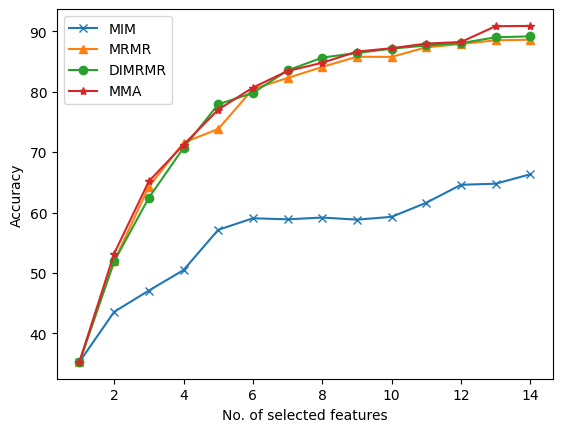

In [41]:
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt

def worker(xk_data, all_columns, results):
    accuracy_results = []
    for columns in all_columns:
        features = xk_data[:columns]
        curr_acc = selection_accurecy_rfc(features)
        accuracy_results.append(curr_acc)
    return accuracy_results

all_columns = [x for x in range(1, 15)]
print(all_columns)

with multiprocessing.Pool() as pool:
    mim_results = pool.apply_async(worker, args=(xk_mim, all_columns, []))
    mrmr_results = pool.apply_async(worker, args=(xk_mrmr, all_columns, []))
    dimrmr_results = pool.apply_async(worker, args=(xk_dimrmr, all_columns, []))
    mma_results = pool.apply_async(worker, args=(xk_mma, all_columns, []))

    mim_accuracy_results = mim_results.get()
    mrmr_accuracy_results = mrmr_results.get()
    dimrmr_accuracy_results = dimrmr_results.get()
    mma_accuracy_results = mma_results.get()

xpoints = np.array(all_columns)

plt.plot(xpoints, mim_accuracy_results, marker='x', label='MIM')
plt.plot(xpoints, mrmr_accuracy_results, marker='^', label='MRMR')
plt.plot(xpoints, dimrmr_accuracy_results, marker='o', label='DIMRMR')
plt.plot(xpoints, mma_accuracy_results, marker='*', label='MMA')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


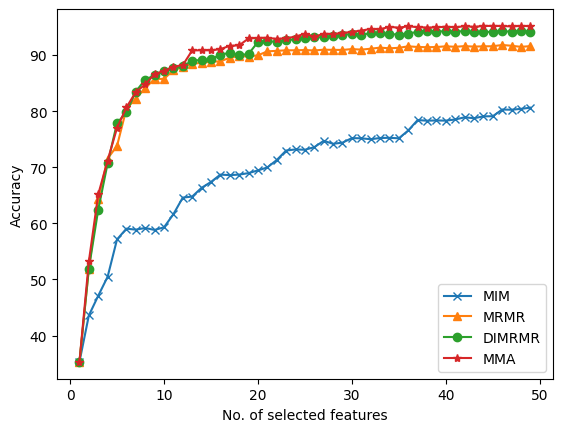

In [42]:
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt

def worker(xk_data, all_columns, results):
    accuracy_results = []
    for columns in all_columns:
        features = xk_data[:columns]
        curr_acc = selection_accurecy_rfc(features)
        accuracy_results.append(curr_acc)
    return accuracy_results

all_columns = [x for x in range(1, 50)]
print(all_columns)

with multiprocessing.Pool() as pool:
    mim_results = pool.apply_async(worker, args=(xk_mim, all_columns, []))
    mrmr_results = pool.apply_async(worker, args=(xk_mrmr, all_columns, []))
    dimrmr_results = pool.apply_async(worker, args=(xk_dimrmr, all_columns, []))
    mma_results = pool.apply_async(worker, args=(xk_mma, all_columns, []))

    mim_accuracy_results = mim_results.get()
    mrmr_accuracy_results = mrmr_results.get()
    dimrmr_accuracy_results = dimrmr_results.get()
    mma_accuracy_results = mma_results.get()

xpoints = np.array(all_columns)

plt.plot(xpoints, mim_accuracy_results, marker='x', label='MIM')
plt.plot(xpoints, mrmr_accuracy_results, marker='^', label='MRMR')
plt.plot(xpoints, dimrmr_accuracy_results, marker='o', label='DIMRMR')
plt.plot(xpoints, mma_accuracy_results, marker='*', label='MMA')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


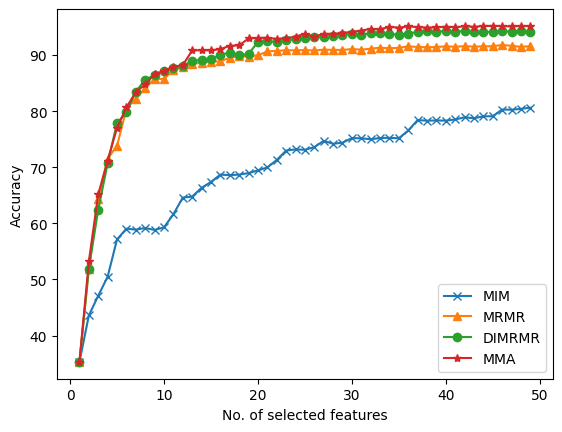

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


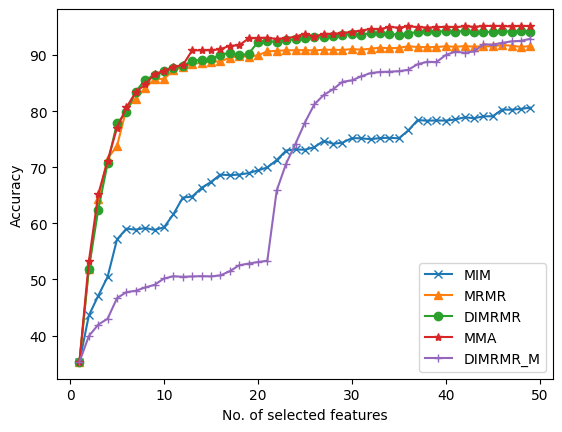

In [47]:
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt

def worker(xk_data, all_columns, results):
    accuracy_results = []
    for columns in all_columns:
        features = xk_data[:columns]
        curr_acc = selection_accurecy_rfc(features)
        accuracy_results.append(curr_acc)
    return accuracy_results

all_columns = [x for x in range(1, 50)]
print(all_columns)

with multiprocessing.Pool() as pool:
    mim_results = pool.apply_async(worker, args=(xk_mim, all_columns, []))
    mrmr_results = pool.apply_async(worker, args=(xk_mrmr, all_columns, []))
    dimrmr_results = pool.apply_async(worker, args=(xk_dimrmr, all_columns, []))
    mma_results = pool.apply_async(worker, args=(xk_mma, all_columns, []))
    dimrmrM_results = pool.apply_async(worker, args=(xk_dimrmrM, all_columns, []))

    mim_accuracy_results = mim_results.get()
    mrmr_accuracy_results = mrmr_results.get()
    dimrmr_accuracy_results = dimrmr_results.get()
    mma_accuracy_results = mma_results.get()
    dimrmrM_accuracy_results = dimrmrM_results.get()

xpoints = np.array(all_columns)

plt.plot(xpoints, mim_accuracy_results, marker='x', label='MIM')
plt.plot(xpoints, mrmr_accuracy_results, marker='^', label='MRMR')
plt.plot(xpoints, dimrmr_accuracy_results, marker='o', label='DIMRMR')
plt.plot(xpoints, mma_accuracy_results, marker='*', label='MMA')
plt.plot(xpoints, dimrmrM_accuracy_results, marker='+', label='DIMRMR_M')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# dimrmr mod
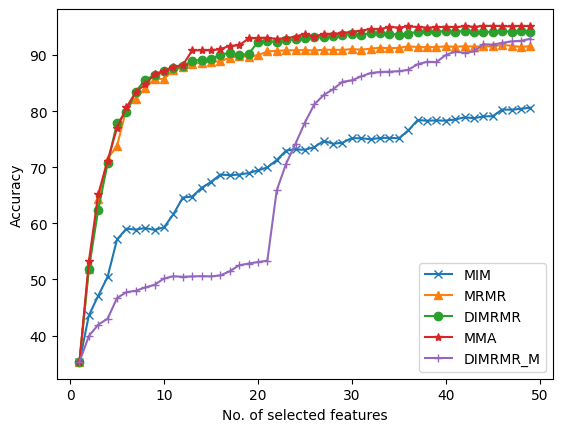

In [48]:
######################## MMA DIMRMR ########################
print('MMA DIMRMR')
xk_dimrmrM = []
dimrmr_vals = [0]*(length-1)
di_vals = [0]*(length-1)
c_ratios_vals = [0]*(length-1)
 
loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)
 
while len(xk_dimrmrM) < loop_counter:
    mi = [0] * (length-1)
    mrmr = [-100] * (length-1)
    c_ratios = [0] * (length-1)
    di = [-100] * (length - 1)
    dimrmr = [-100] * (length - 1)
 
 
    for i in range(length - 1):
        if (i in xk_dimrmrM):
            continue
 
        icfk = get_mutual_info(i, length - 1) #calculation done for MIM
        mi[i] = icfk    #I (c fk )
 
        ifkxk = 0 #1/f x I (fk  xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_dimrmrM)):
            ifkxk += get_mutual_info(i, xk_dimrmrM[j])
 
        if (len(xk_dimrmrM)):
            ifkxk = ifkxk / len(xk_dimrmrM)
 
        mrmr[i] = icfk - ifkxk  #calculation done for MRMR
 
        #DIMRMRicfk
        avg_dep = 0
        iFcfk = 0
        # print(feature_list[i])
 
        for j in range(len(xk_dimrmrM)):
            avg_dep += conditional_mutual_info(i, length - 1, xk_dimrmrM[j])
            iFcfk += (conditional_mutual_info(xk_dimrmrM[j], length - 1, i) - get_mutual_info(xk_dimrmrM[j], i))
        if (len(xk_dimrmrM)):
            avg_dep = avg_dep / len(xk_dimrmrM)
            iFcfk = iFcfk / len(xk_dimrmrM)
 
        cr = avg_dep - get_mutual_info(i, length - 1)   #c ratio
        c_ratios[i] = cr
        cr_st = 2 * (cr) / (entropy_list[i] + entropy_list[length - 1]) # c ratio normalized
 
        di[i] = (2 + cr_st) * (iFcfk)   #DI, dynamic interaction weight
 
#         fix issue for first one, where there is no DI value yet.
        if len(xk_dimrmrM) == 0:
            di[i] = 1
        dimrmr[i] = (icfk - ifkxk) * di[i]
 
 
    (m, p) = max((v, i) for i, v in enumerate(dimrmr))
    print(f'max value {m} for feature {p}, DI value: {di[p]}, C ratio: {c_ratios[p]}')
    # if len(xk_dimrmr)==0:
    #     print(p)
    #     print(mrmr[p])
    #     print(f'dimrmr: {dimrmr[p]}')
    # print(dimrmr)
 
    xk_dimrmrM.append(p)
    dimrmr_vals[p] = m
    di_vals[p] = di[p]
    c_ratios_vals[p] = c_ratios[p]
 
 
print("MMA DIMRMR features serially")
print(xk_dimrmrM)
print('-----------------------------------')

MMA DIMRMR
max value 0.908390471781888 for feature 195, DI value: 1, C ratio: -0.908390471781888
max value 1.56713289847636 for feature 194, DI value: -2.387733688750637, C ratio: -0.7254532748883102
max value 1.5457899227142262 for feature 193, DI value: -2.3455518283286825, C ratio: -0.6825684404145602
max value 1.155001996522871 for feature 192, DI value: -1.8809863325979324, C ratio: -0.5870738973516195
max value 1.1272755561415675 for feature 208, DI value: -1.9227821226151247, C ratio: -0.5863206120006955
max value 1.1880327364702097 for feature 209, DI value: -2.2091666706910567, C ratio: -0.6722266754106692
max value 0.9876206441109073 for feature 210, DI value: -2.0754076685291034, C ratio: -0.6702202818746159
max value 0.9747156667016087 for feature 75, DI value: 1.5870506950542775, C ratio: 0.0077416772566411
max value 0.728539185856172 for feature 119, DI value: 1.425835422594675, C ratio: -0.004466951872574398
max value 0.6883843825583165 for feature 14, DI value: 1.428015

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


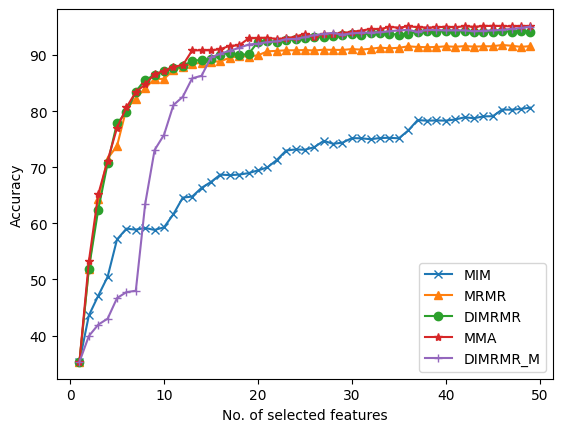

In [49]:
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt

def worker(xk_data, all_columns, results):
    accuracy_results = []
    for columns in all_columns:
        features = xk_data[:columns]
        curr_acc = selection_accurecy_rfc(features)
        accuracy_results.append(curr_acc)
    return accuracy_results

all_columns = [x for x in range(1, 50)]
print(all_columns)

with multiprocessing.Pool() as pool:
    # mim_results = pool.apply_async(worker, args=(xk_mim, all_columns, []))
    # mrmr_results = pool.apply_async(worker, args=(xk_mrmr, all_columns, []))
    # dimrmr_results = pool.apply_async(worker, args=(xk_dimrmr, all_columns, []))
    # mma_results = pool.apply_async(worker, args=(xk_mma, all_columns, []))
    dimrmrM_results = pool.apply_async(worker, args=(xk_dimrmrM, all_columns, []))

    # mim_accuracy_results = mim_results.get()
    # mrmr_accuracy_results = mrmr_results.get()
    # dimrmr_accuracy_results = dimrmr_results.get()
    # mma_accuracy_results = mma_results.get()
    dimrmrM_accuracy_results = dimrmrM_results.get()

xpoints = np.array(all_columns)

plt.plot(xpoints, mim_accuracy_results, marker='x', label='MIM')
plt.plot(xpoints, mrmr_accuracy_results, marker='^', label='MRMR')
plt.plot(xpoints, dimrmr_accuracy_results, marker='o', label='DIMRMR')
plt.plot(xpoints, mma_accuracy_results, marker='*', label='MMA')
plt.plot(xpoints, dimrmrM_accuracy_results, marker='+', label='DIMRMR_M')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# mistaken mod of dimrmr
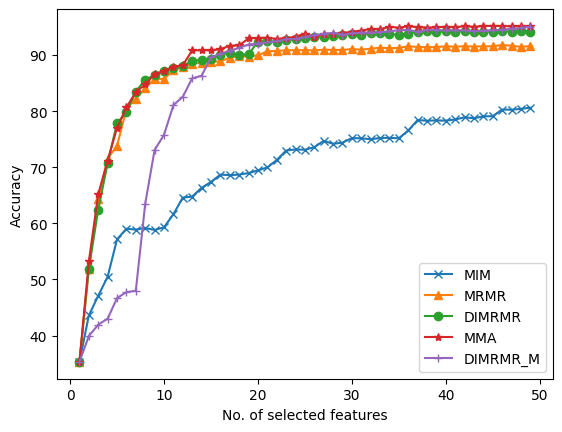